In [ ]:
Exploratory Data Analysis on Game of Thrones

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
print(df.columns)
df.shape

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')


(38, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [6]:
df.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

In [7]:
# Drop columns and update the data 
df.drop(columns=['defender_3','defender_4','note', 'battle_number'],inplace=True)

In [8]:
df.T.nunique(axis=1)

name                  38
year                   3
attacker_king          4
defender_king          6
attacker_1            11
attacker_2             7
attacker_3             2
attacker_4             1
defender_1            12
defender_2             2
attacker_outcome       2
battle_type            4
major_death            2
major_capture          2
attacker_size         19
defender_size         14
attacker_commander    31
defender_commander    28
summer                 2
location              27
region                 7
dtype: int64

# King/Kings who won maximum number of Wars

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Balon/Euron Greyjoy'),
  Text(1, 0, 'Joffrey/Tommen Baratheon'),
  Text(2, 0, 'Robb Stark'),
  Text(3, 0, 'Stannis Baratheon')])

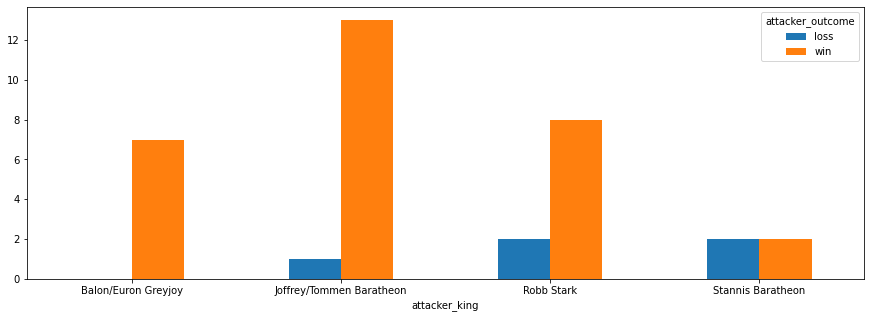

In [11]:
pd.crosstab(df['attacker_king'],df['attacker_outcome']).plot(kind='bar',figsize=(15,5))
plt.xticks(rotation='horizontal')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Balon/Euron Greyjoy'),
  Text(1, 0, 'Joffrey/Tommen Baratheon'),
  Text(2, 0, 'Mance Rayder'),
  Text(3, 0, 'Renly Baratheon'),
  Text(4, 0, 'Robb Stark'),
  Text(5, 0, 'Stannis Baratheon')])

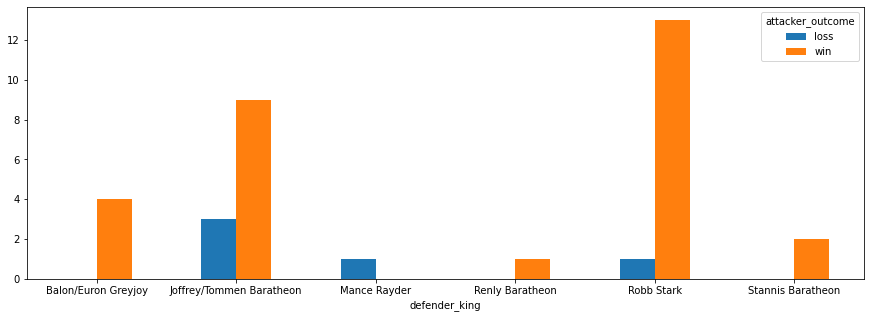

In [12]:
pd.crosstab(df['defender_king'],df['attacker_outcome']).plot(kind='bar',figsize=(15,5))
plt.xticks(rotation='horizontal')

In [ ]:
Results:Joffrey/Tommen Baratheon wons maximum wars under attacker king
        Robb Stark wons maximum wars under defender king.

# 2.Commander who fought in maximum number of wars

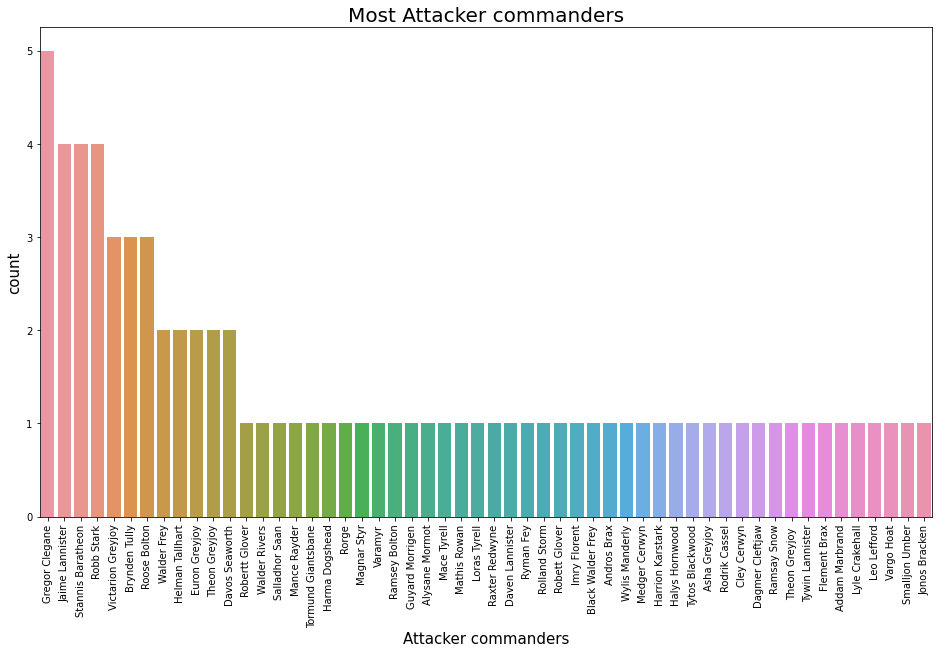

In [13]:
at=df[df['attacker_commander'].notna()]['attacker_commander'].str.cat(sep=', ').split(', ')
ats=pd.Series(at).value_counts()
plt.figure(figsize=(16,9))
sns.barplot(x=ats.index,y=ats.values)
plt.title('Most Attacker commanders',fontsize=20)
plt.xlabel('Attacker commanders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

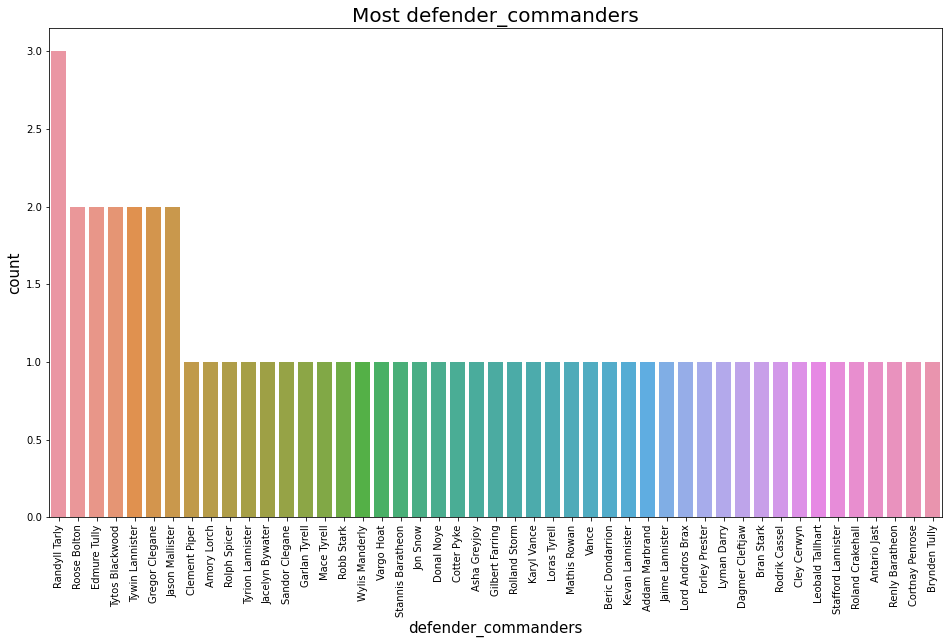

In [15]:
de=df[df['defender_commander'].notna()]['defender_commander'].str.cat(sep=', ').split(', ')
defn=pd.Series(de).value_counts()
plt.figure(figsize=(16,9))
sns.barplot(x=defn.index,y=defn.values)
plt.title('Most defender_commanders',fontsize=20)
plt.xlabel('defender_commanders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# 3Kingdom/region were most number of Wars took place

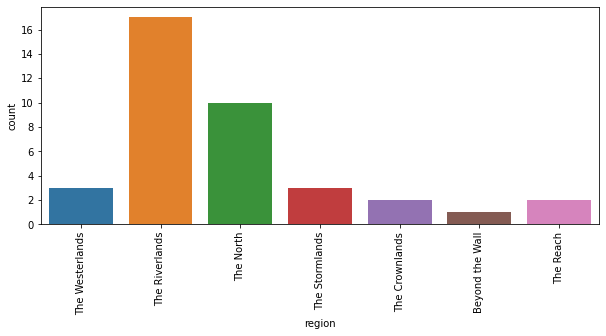

In [16]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.countplot(x='region',data=df)
plt.show()